In [2]:
% pylab inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pb
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


# Plotting the Log Likelihood

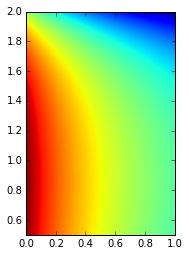

In [8]:
N = 100
M = 1000
mu = np.linspace(0.0, 1.0, M)
var = np.linspace(0.5,2.0, M)
z = np.zeros((M,M))
XX = np.random.normal(0.0, 1.0, N)
for i in range(0, mu.shape[0]):
    for j in range(0, var.shape[0]):
        X = XX[:,None]
        mult = (np.transpose(X) - mu[i])
        mult2 = X - mu[i]
        remult = np.dot(mult,mult2)
        img = ((-1.0/(2*var[i]))*(remult)) - ((N/2.0)*np.log(math.pi*2.0*var[j]))
        z[i][j] = img
pb.imshow(z, extent=[0.0,1.0,0.5,2.0])

/Users/juangilopez/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<matplotlib.contour.QuadContourSet instance at 0x10ca93200>

/Users/juangilopez/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


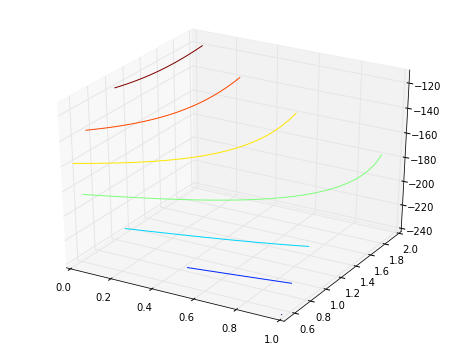

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
#ax.plot_trisurf(mu, var, np.diag(z), cmap=cm.jet, linewidth=0.2, vmin = 0.0, vmax = 2.0)
ax.contour(mu, var, z)#, cmap=cm.coolwarm)

# Expectation maximization

In [214]:
N = 50
D = 3
M = 2
ini_z = np.random.rand(N,M)
ini_z = np.matrix(ini_z)

W = np.random.random_sample((D,M))
W = np.matrix(W)
#ini_z = ini_z[:,None]
W[0,0] = 1.0
W[1,0] = 0.0
W[2,0] = 0.0

W[0,1] = 0.0
W[1,1] = 1.0
W[2,1] = 0.0

X = W*np.transpose(ini_z)
cov_noise = np.eye(D)*0.01
mean_noise = np.zeros(D)
sample_noise = np.random.multivariate_normal(mean_noise, cov_noise, N)
X = np.transpose(X) + sample_noise
print ini_z.shape, W.shape, X.shape

(50, 2) (3, 2) (50, 3)


(50, 1) (2, 1) (50, 2)


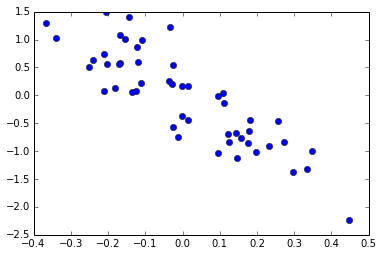

In [219]:
N = 50
D = 2
M = 1
ini_z = np.random.normal(0.0,1.0, N)
W = np.random.random_sample((D,M))
ini_z = ini_z[:,None]
W[0] = -0.2
W[1] = 1.0
X = ini_z*np.transpose(W)
cov_noise = np.eye(D)*0.01
mean_noise = np.zeros(D)
sample_noise = np.random.multivariate_normal(mean_noise, cov_noise, N)
X = X + sample_noise
print ini_z.shape, W.shape, X.shape
pb.plot(X[:,0], X[:,1], 'bo')

In [220]:
Qold = 0.0
Qnew = 1.0
EPS = 0.00001
W_estim = np.random.random_sample((D,M))
W_estim = np.matrix(W_estim)
X = np.matrix(X)
#print X.shape
sigma_estim = 0.5
cont = 0
sample_mean = np.sum(X, axis=0) # Media muestral
sample_mean = sample_mean*(1.0/N) # Media muestral
#print sample_mean
covariances = []
for i in range(0,N):
    tmp = np.zeros((M,M))
    tmp = np.matrix(tmp)
    covariances.append(tmp)

m1 = X
m1_norm = np.zeros((X.shape[0],1))
m1_norm = np.matrix(m1_norm)
#print m1.shape, sample_mean.shape
for i in range(0, X.shape[0]):
    m1[i,:] = m1[i,:] - sample_mean
    m1_norm[i,0] = np.asscalar(m1[i,:]*np.transpose(m1[i,:]))
    
while(np.fabs(Qold - Qnew) >= EPS and cont <= 1000):
    # calcular Qold
    # Calcular valores esperados
    M_tmp = np.transpose(W_estim)*W_estim + sigma_estim*np.eye(M) # calcular matriz M
    #print M_tmp.shape
    exp_z = (np.linalg.inv(M_tmp)*np.transpose(W_estim))*(np.subtract(np.transpose(X), np.transpose(sample_mean))) # valor esperado Z
    #print exp_z.shape
    for i in range(0,N):        
        tmp_cov = ((sigma_estim)*np.linalg.inv(M_tmp)) + np.outer(exp_z[:,i],np.transpose(exp_z[:,i]))
        covariances[i] = tmp_cov        
        
    # actualizar parametros    
    # Estimando W
    W_estim = (m1.T*exp_z.T)
    super_cov_z = covariances[0]    
    for i in range(1,N):
        super_cov_z += covariances[i]
    #print super_cov_z.shape, W_estim.shape
    W_estim = W_estim*np.linalg.inv(super_cov_z)
    
    # Estimando sigma
    sigma_estim = 0.0
    for i in range(0,N):         
        sigma_estim += m1_norm[i,0] - np.asscalar((2.0*(exp_z[:,i].T*W_estim.T*m1[i,:].T))) + np.trace(covariances[i]*W_estim.T*W_estim)
        sigma_estim = sigma_estim/N*D
    cont += 1
print W_estim
print sigma_estim

[[ 0.06902929]
 [-0.34823925]]
0.000331654234407


In [221]:
mnorm = np.linalg.norm(W_estim)
W_estim = W_estim*(1.0/mnorm)
mnorm_real = np.linalg.norm(W)
W_comp = W*(1.0/mnorm_real)
print 'estimada: '
print W_estim
print 'real: '
print W_comp
print 'sigma estimado: '
print np.sqrt(sigma_estim)

estimada: 
[[ 0.19444051]
 [-0.98091431]]
real: 
[[-0.19611614]
 [ 0.98058068]]
sigma estimado: 
0.0182113765105
